In [38]:
import matplotlib.pyplot as plt
import numpy as np

# One-Sample Tests

## Proportion Hypothesis Tests

### References

* Perform a binomial test that the probability of success is p https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binomtest.html
* binomtest.proportion_ci https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats._result_classes.BinomTestResult.proportion_ci.html
* Calculate the T-test for the mean of ONE group of scores https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html

In [2]:
from scipy.stats import binom, binomtest
from statsmodels.stats.proportion import proportion_confint, samplesize_confint_proportion

In [3]:
# A car manufacturer claims that no more than 10% of their cars are unsafe.
# 15 cars are inspected for safety, 3 were found to be unsafe.
result = binomtest(3, n=15, p=0.1, alternative="greater")
result

BinomTestResult(k=3, n=15, alternative='greater', proportion_estimate=0.2, pvalue=0.18406106910639106)

In [4]:
# 10 randomly selected couple, 9 babies are girls.
# H1: p(baby girl) > 0.75.
result = binomtest(9, n=10, p=0.75, alternative="greater")
result

BinomTestResult(k=9, n=10, alternative='greater', proportion_estimate=0.9, pvalue=0.24402523040771484)

In [5]:
# 1009 consumers polled. 545 of them happy with the new store.
# Are the majority content with the new store?
result = binomtest(545, n=1009, p=0.5, alternative="greater")
ci = result.proportion_ci(confidence_level=0.95, method="exact")

# 90% confidence since the hypothesis test is not two-sided.
ci_low, ci_high = proportion_confint(
    count=545,  # Number of "successes"
    nobs=1_009,  # Number of trials.
    alpha=(1 - 0.90))

estimate_n = samplesize_confint_proportion(proportion=0.5, half_length=0.026, alpha=(1-0.90))

print(result)
print(f"estimated proportion CI: {ci}")
print(f"confint CI: ({ci_low}, {ci_high})")
print(f"estimate sample size from statsmodel: {estimate_n}")

BinomTestResult(k=545, n=1009, alternative='greater', proportion_estimate=0.5401387512388504, pvalue=0.005873947098135836)
estimated proportion CI: ConfidenceInterval(low=0.5137732801593696, high=1.0)
confint CI: (0.5143311435124278, 0.5659463589652729)
estimate sample size from statsmodel: 1000.5708040293697


In [6]:
# 24 people and we found that 13 of them are smokers.
# Can we claim that the proportion of smokers in the population is at least 35% at a 5% level of significance?
for i in range(24+1): # range is not inclusive on the right.
    res = binomtest(i, n=24, p=0.35, alternative="greater")
    pval = res.pvalue
    point_est = res.proportion_estimate
    ci = res.proportion_ci(confidence_level=0.95, method="exact")
    marker = "<--" if pval <= 0.05 else ""
    print(f"k={i:2}  p-value:{pval:5.6f}  proportion estimate:{point_est:5.3f}  CI:({ci.low:5.3f},{ci.high:5.3f}) {marker}")

k= 0  p-value:1.000000  proportion estimate:0.000  CI:(0.000,1.000) 
k= 1  p-value:0.999968  proportion estimate:0.042  CI:(0.002,1.000) 
k= 2  p-value:0.999550  proportion estimate:0.083  CI:(0.015,1.000) 
k= 3  p-value:0.996960  proportion estimate:0.125  CI:(0.035,1.000) 
k= 4  p-value:0.986737  proportion estimate:0.167  CI:(0.059,1.000) 
k= 5  p-value:0.957836  proportion estimate:0.208  CI:(0.086,1.000) 
k= 6  p-value:0.895589  proportion estimate:0.250  CI:(0.115,1.000) 
k= 7  p-value:0.789448  proportion estimate:0.292  CI:(0.146,1.000) 
k= 8  p-value:0.642484  proportion estimate:0.333  CI:(0.178,1.000) 
k= 9  p-value:0.474324  proportion estimate:0.375  CI:(0.212,1.000) 
k=10  p-value:0.313350  proportion estimate:0.417  CI:(0.246,1.000) 
k=11  p-value:0.183333  proportion estimate:0.458  CI:(0.282,1.000) 
k=12  p-value:0.094230  proportion estimate:0.500  CI:(0.319,1.000) 
k=13  p-value:0.042253  proportion estimate:0.542  CI:(0.358,1.000) <--
k=14  p-value:0.016419  proport

In [7]:
# 95th percentile (confidence level). N=24 and proportion of 0.35.
# 1-tailed test.
binom.ppf(q=0.95, n=24, p=0.35)

# Ans: 12. We can see from the above that this matches with k=13 being a critical value.
# Remember we reject the null for every value greater than or equal to the critical value.

12.0

In [8]:
# Triple check: the area to the right of k=12 is indeed less than alpha of 0.05.
binom.sf(k=12, n=24, p=0.35)

0.042253074798904944

$$
\alpha = P (\text{type I error}) = P(\text{false positive}) = P (\text{reject }H_0 | H_0 \text{ is true})
$$

$$
\beta = P (\text{type II error}) = P(\text{false negative}) = P (\text{fail to reject } H_0 | H_0 \text{ is false}) = P (\text{fail to reject } H_0 | H_1 \text{ is true})
$$

Power is then defined as
$$
Power = 1 - \beta (\text{type II error}) = 1 - P (\text{fail to reject } H_0 | H_0 \text{ is false}) = P (\text{reject }H_0 | H_0 \text{ is false})
$$
Or in a more wordy-way
$$
P(\text{true positive}) = 1 - P(\text{false negative})
$$

Putting it in a more concrete way
$$
Power = P(X \geq \text{critical value} | n, \hat{p}) = 1 - P(X \leq \text{c - 1} | n, \hat{p})
$$
$\hat{p}$ is the observed proprtion (i.e., the 13 smokers we found in our sample of 24.

Some useful references
* How to Get the Power of Test in Hypothesis Testing with Binomial Distribution https://predictivehacks.com/how-to-get-the-power-of-test-in-hypothesis-testing-with-binomial-distribution/
* A Gentle Introduction to Statistical Power and Power Analysis in Python https://machinelearningmastery.com/statistical-power-and-power-analysis-in-python/

In [9]:
power = 1.0 - binom.cdf(k=12, n=24, p=13/24)
power

0.5830354279549568

In [10]:
# Power is 58.3%.
binom.sf(k=12, n=24, p=13/24)

0.5830354279549568

In [11]:
def proportion_sample_size(proportion_test, proportion_obs, confidence_level=0.95, power=0.8):
    """
    proportion_test is the proportion being tested in the hypothesis test.
    proportion_obs is the proportion observed in our sample.
    """
    n=0
    while True:
        critical_val = binom.ppf(q=confidence_level, n=n, p=proportion_test)
        calculated_power = binom.sf(k=critical_val, n=n, p=proportion_obs)
        if n >= 30 and n%500 == 0:
            print(f"iteration={n} c={critical_val} calculated power={calculated_power}")
        if calculated_power >= power:
            print(f"iteration {n} critical value {critical_val} power = {calculated_power}")
            return n
        if calculated_power <= 1e-6 and n > 10_000:
            print(f"iteration {n} critical value {critical_val} power = {calculated_power}")
            return n
        n += 1

In [12]:
# When prop_test > prop_obs: power -> 0.
# The sf of a distribution with with the lower obs prop is 0 when using a critical value from a dist with a higher prop.
proportion_sample_size(proportion_test=0.35, proportion_obs=0.33)

iteration=500 c=193.0 calculated power=0.003677571056930431
iteration=1000 c=375.0 calculated power=0.0012185542487367685
iteration=1500 c=555.0 calculated power=0.0004948164096803965
iteration=2000 c=735.0 calculated power=0.00018487682519291036
iteration=2500 c=914.0 calculated power=7.94774642815347e-05
iteration=3000 c=1093.0 calculated power=3.3356838931427966e-05
iteration=3500 c=1271.0 calculated power=1.61571226308318e-05
iteration=4000 c=1450.0 calculated power=6.631262576346431e-06
iteration=4500 c=1628.0 calculated power=3.14662361282887e-06
iteration=5000 c=1806.0 calculated power=1.4830668011233708e-06
iteration=5500 c=1983.0 calculated power=8.015756796702325e-07
iteration=6000 c=2161.0 calculated power=3.741398280658078e-07
iteration=6500 c=2338.0 calculated power=1.998960636188232e-07
iteration=7000 c=2516.0 calculated power=9.287433664326712e-08
iteration=7500 c=2693.0 calculated power=4.928736340063574e-08
iteration=8000 c=2870.0 calculated power=2.6074272318582035e-0

10001

In [13]:
# 14 babies and 13 were girls.
# H0: p = 0.5 and H1: p > 0.5.
for i in range(14+1): # range is not inclusive on the right.
    res = binomtest(i, n=14, p=0.5, alternative="greater")
    pval = res.pvalue
    point_est = res.proportion_estimate
    ci = res.proportion_ci(confidence_level=0.95, method="exact")
    marker = "<--" if pval <= 0.05 else ""
    print(f"k={i:2}  p-value:{pval:5.6f}  proportion estimate:{point_est:5.3f}  CI:({ci.low:5.3f},{ci.high:5.3f}) {marker}")

k= 0  p-value:1.000000  proportion estimate:0.000  CI:(0.000,1.000) 
k= 1  p-value:0.999939  proportion estimate:0.071  CI:(0.004,1.000) 
k= 2  p-value:0.999084  proportion estimate:0.143  CI:(0.026,1.000) 
k= 3  p-value:0.993530  proportion estimate:0.214  CI:(0.061,1.000) 
k= 4  p-value:0.971313  proportion estimate:0.286  CI:(0.104,1.000) 
k= 5  p-value:0.910217  proportion estimate:0.357  CI:(0.153,1.000) 
k= 6  p-value:0.788025  proportion estimate:0.429  CI:(0.206,1.000) 
k= 7  p-value:0.604736  proportion estimate:0.500  CI:(0.264,1.000) 
k= 8  p-value:0.395264  proportion estimate:0.571  CI:(0.325,1.000) 
k= 9  p-value:0.211975  proportion estimate:0.643  CI:(0.390,1.000) 
k=10  p-value:0.089783  proportion estimate:0.714  CI:(0.460,1.000) 
k=11  p-value:0.028687  proportion estimate:0.786  CI:(0.534,1.000) <--
k=12  p-value:0.006470  proportion estimate:0.857  CI:(0.615,1.000) <--
k=13  p-value:0.000916  proportion estimate:0.929  CI:(0.703,1.000) <--
k=14  p-value:0.000061  p

In [14]:
binom.ppf(q=0.95, n=14, p=0.5) # Critical value.

10.0

In [15]:
binom.sf(k=10, n=14, p=0.5) # Area to the right of the critical value.

0.0286865234375

In [16]:
1.0 - binom.cdf(k=10, n=14, p=13/14) # Power.

0.9854295609664715

In [17]:
binom.sf(k=10, n=14, p=13/14) # Power.

0.9854295609664715

## Mean Hypothesis Tests

### References

* Calculate the T-test for the mean of ONE group of scores https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html

In [18]:
from scipy.stats import t, ttest_1samp

def mean_margin_of_error(sample_std, sample_size, confidence_lvl=0.95) -> float:
    df = sample_size - 1
    alpha = 1 - confidence_lvl
    critical_value = t.ppf(confidence_lvl + (alpha / 2.0), df=df) # We want the t score from the desired covered area.
    
    print(f"using critical value of {critical_value}")
    return critical_value * (sample_std / np.sqrt(sample_size))

In [30]:
sample = np.array([4, 4, 4, 8, 8, 6, 9, 7, 10, 7, 8, 7])
result = ttest_1samp(sample, popmean=7, alternative="less")

mean = sample.mean()

# 90% confidence interval because it is not a two-sided test.
mean_err = mean_margin_of_error(sample.std(ddof=1), sample.size, confidence_lvl=0.9)

print(f"mean: {mean}")
print(result)
print(f"ci: ({mean-mean_err}, {mean+mean_err})")
# The critical value from the mean_margin_of_error function is 1.795.
# Since this is a left-tailed test, the value should actually be negative.

using critical value of 1.7958848187036691
mean: 6.833333333333333
Ttest_1sampResult(statistic=-0.28977485337560827, pvalue=0.3886888458624178)
ci: (5.800413696022227, 7.866252970644439)


* solve for any one parameter of the power of a one sample t-test https://www.statsmodels.org/stable/generated/statsmodels.stats.power.tt_solve_power.html
* Statistical Power calculations for one sample or paired sample t-test https://www.statsmodels.org/stable/generated/statsmodels.stats.power.TTestPower.html

In [20]:
from statsmodels.stats.power import TTestPower, tt_solve_power

In [35]:
# Effect size is the difference between then mean under H0 and H1 divided by teh standard deviation.
#
# H0: mu = 850 hrs and H1: mu = 810 hrs.
# Example from https://stats.oarc.ucla.edu/other/gpower/power-analysis-for-one-sample-t-test/
tt_solve_power(effect_size=(850-810)/50,
               nobs=None,
               alpha=0.05,
               power=0.9,
               alternative="two-sided")
# Ans: 19 (18 df).

18.446225469774838

In [39]:
ttest = TTestPower()

res = ttest.solve_power(effect_size=(850-810)/50,
               nobs=None,
               alpha=0.05,
               power=0.9,
               alternative="two-sided")
est_power = ttest.power(effect_size=(850-810)/50, nobs=19, alpha=0.05, df=18, alternative="two-sided")

print(res)
print(est_power)

18.446225469774838
0.9092070305788685


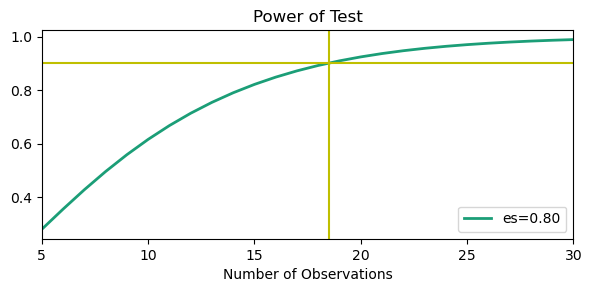

In [87]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))

ttest = TTestPower()
ttest.plot_power(
    dep_var="nobs",
    effect_size=np.array([(850-810)/50]),
    nobs=np.arange(5, 31),
    alpha=0.05,
    ax=ax)

ax.axhline(y=0.90, xmin=0.0, xmax=30, color='y')
ax.axvline(x=18.5, color='y')

ax.set_xlim(xmin=5, xmax=30)
#ax.set_ylim(ymin=0)
fig.tight_layout(pad=1.0)
plt.show()

# Two-Sample Tests

## References

* Calculate the T-test for the means of two independent samples of scores https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

* Statistical Power calculations for t-test for two independent sample https://www.statsmodels.org/stable/generated/statsmodels.stats.power.TTestIndPower.html

In [88]:
from statsmodels.stats.power import TTestIndPower

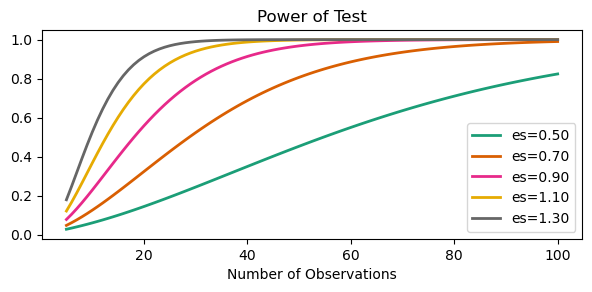

In [90]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))

panalysis = TTestIndPower()

panalysis.plot_power(
    dep_var="nobs",
    nobs=np.arange(5, 101),
    effect_size=np.arange(0.5, 1.5, .2),
    alpha=0.01,
    ax=ax,
)
fig.tight_layout(pad=1.0)
plt.show()

In [32]:
from statsmodels.stats.proportion import power_ztost_prop

# P Values

## References

* Combine p-values from independent tests that bear upon the same hypothesis https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.combine_pvalues.html